Columns in dataset: Index(['PatientID', 'BloodPressure', 'SugarLevel', 'OxygenSaturation',
       'PredictionResult'],
      dtype='object')
First 5 rows:
    PatientID  BloodPressure  SugarLevel  OxygenSaturation  PredictionResult
0          1             93         104                96               NaN
1          2            107         110                99               NaN
2          3             92         128               100               NaN
3          4            106          74                97               NaN
4          5            109          84                97               NaN
Missing values:
 PatientID              0
BloodPressure          0
SugarLevel             0
OxygenSaturation       0
PredictionResult    1000
dtype: int64


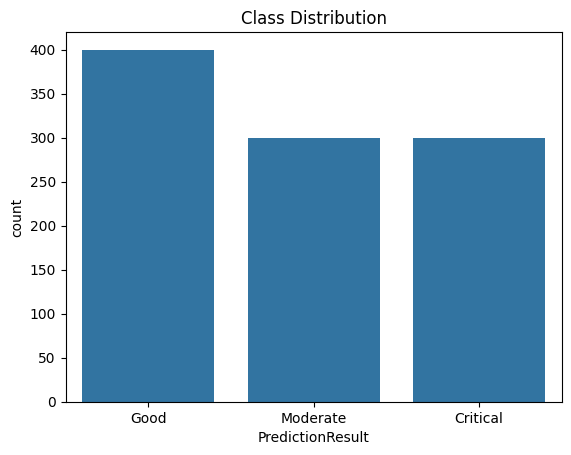

Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

    Critical       1.00      1.00      1.00        60
        Good       1.00      1.00      1.00        80
    Moderate       1.00      1.00      1.00        60

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



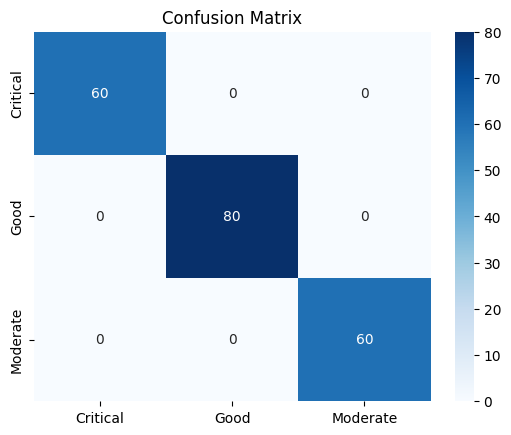

Updated file saved at: /content/patient_data_with_predictions.xlsx


In [ ]:
# ============================
# STEP 1: Install Dependencies
# ============================
!pip install pandas scikit-learn openpyxl matplotlib seaborn

# ============================
# STEP 2: Import Libraries
# ============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ============================
# STEP 3: Mount Google Drive
# ============================

# ============================
# STEP 4: Load Data
# ============================
file_path = 'synthetic_patient_data.xlsx'  # Update path
df = pd.read_excel(file_path)

print("Columns in dataset:", df.columns)
print("First 5 rows:\n", df.head())

# ============================
# STEP 5: Check Missing Values
# ============================
print("Missing values:\n", df.isnull().sum())

# ============================
# STEP 6: Create Labels Based on Ranges
# ============================
def classify_health(bp, sugar, oxygen):
    if bp >= 140 or sugar >= 200 or oxygen < 90:
        return "Critical"
    elif (121 <= bp <= 139) or (141 <= sugar <= 199) or (90 <= oxygen <= 94):
        return "Moderate"
    else:
        return "Good"

df['PredictionResult'] = df.apply(lambda row: classify_health(row['BloodPressure'], row['SugarLevel'], row['OxygenSaturation']), axis=1)

# ============================
# STEP 7: Visualize Class Distribution
# ============================
sns.countplot(x='PredictionResult', data=df)
plt.title("Class Distribution")
plt.show()

# ============================
# STEP 8: Define Features and Target
# ============================
X = df[['BloodPressure', 'SugarLevel', 'OxygenSaturation']]
y = df['PredictionResult']

# ============================
# STEP 9: Train-Test Split
# ============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ============================
# STEP 10: Train Model
# ============================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ============================
# STEP 11: Evaluate Model
# ============================
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.show()

# ============================
# STEP 12: Predict for All Data
# ============================
df['PredictionResult'] = model.predict(X)

# ============================
# STEP 13: Save Updated Excel
# ============================
output_path = '/content/patient_data_with_predictions.xlsx'
df.to_excel(output_path, index=False)
print(f"Updated file saved at: {output_path}")

In [ ]:
# ============================
# STEP 14: Load New Data
# ============================
new_file_path = 'Patient_Data.xlsx'  # Upload your new file here
new_df = pd.read_excel(new_file_path)

print("New data:\n", new_df)

# ============================
# STEP 15: Prepare Features
# ============================
X_new = new_df[['BloodPressure', 'SugarLevel', 'OxygenSaturation']]

# ============================
# STEP 16: Predict Using Trained Model
# ============================
new_df['PredictionResult'] = model.predict(X_new)

print("Predictions:\n", new_df)

# ============================
# STEP 17: Save Updated File
# ============================
output_new_path = '/content/new_patient_data_with_predictions.xlsx'
new_df.to_excel(output_new_path, index=False)

# Download the file
from google.colab import files
files.download(output_new_path)

New data:
    PatientID          PatientName  Gender  BloodPressure  Age  SugarLevel  \
0    HCM-001            Anirudra     Male             70   80          67   
1    HCM-002                Makur  Female            120   45          89   
2    HCM-003                  Ani  Others            130   21          90   
3    HCM-004  Cristiano Ronaldo 0    Male            179   28          45   
4    HCM-005                 Ani7    Male            179   50          45   
5    HCM-006               berrrr    Male             67   30         100   
6    HCM-007                Messi    Male            133   27         456   
7    HCM-010                   A1  Female             89   90          67   
8    HCM-011   Anirudra Makur new    Male             89   56          45   
9    HCM-012                   gg  Female            100   45          90   
10   HCM-013                   hj    Male            120   67          50   
11   HCM-014                  leo    Male             56   45    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>